<b><font size="6">SVM</font><a class="anchor"><a ></a></b><br>

In this notebook we are going to apply SVM for classification in Python.

<div class="alert alert-block alert-info">
    
# TOC<a class="anchor"><a id='toc'></a></b><br>
* [<font color='#E8800A'>Simple Example</font>](#first-bullet) <br>
- [<font color='#E8800A'>SVC</font>](#second-bullet)<br>
- [<font color='#E8800A'>Exercise</font>](#third-bullet)<br>
    
</div>

# <font color='#E8800A'>Simple Example</font> <a class="anchor" id="first-bullet"></a>
  [Back to TOC](#toc)

Let's start with a very simple dataset that has only two features, X1 and X2, and a binary target variable, so that we can easily understand and plot what we are doing! <br>
***Note:*** For now we are not worried with actually performing classification, we just want to understand how a SVM works in a simple setting.

__Step 1:__ Import the data (don't forget to import pandas to read the excel file)

In [1]:
#import the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

#import data
dataset = pd.read_csv('2_classes.csv')
dataset.head()

,X1,X2,Y
0,3,7,0
1,12,6,0
2,18,6,0
3,12,6,0
4,3,7,0


__Step 2:__ Use the code below to plot the data on a scatterplot

/Users/carlos.costa/anaconda3/envs/DM2324/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


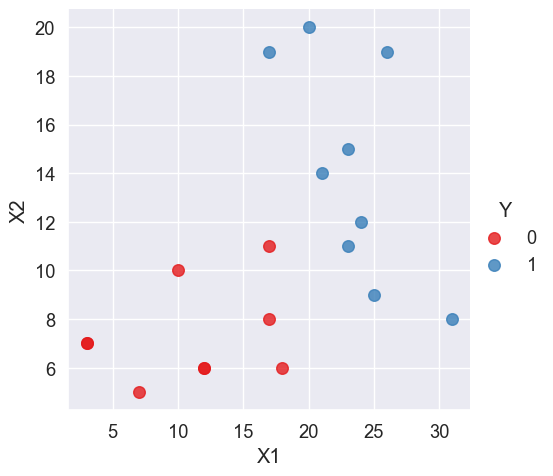

In [2]:
sns.lmplot(x = 'X1', y = 'X2', data=dataset, hue='Y',
    palette='Set1', fit_reg=False, scatter_kws={"s": 70})

__Step 3:__ Import the SVC from sklearn.svm

<div class="alert alert-block alert-info">
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True,...)</a>

__Definition:__ <br>
C-Support Vector Classification.<br><br>

__Advantages:__
The advantages of support vector machines are:

- Effective in high dimensional spaces.

- Still effective in cases where number of dimensions is greater than the number of samples.

- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
</div>

In [3]:
from sklearn.svm import SVC

__Step 4:__ Assign to the object `data` the values excepting the dependent variable

In [4]:
data = dataset.drop(['Y'], axis=1)

__Step 5:__ Assign to the object `target`the dependent variable

In [5]:
target = dataset['Y']

__Step 6:__ Create a SVM classifier instance called modelSVM with a `linear` kernel

In [6]:
modelSVM = SVC(kernel='linear')

### Methods in SVC

__Step 7:__ Use the `.fit()`method of model to fit the model to the data.

In [7]:
modelSVM.fit(data,target)

SVC(kernel='linear')

__Step 8:__ Use the `.predict()` method to perform classification.

In [8]:
modelSVM.predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

__Step 11:__ Use the `.score()` method to obtain the mean accuracy of our model for the given data.

In [9]:
modelSVM.score(data, target)

1.0

## Let's visualize the results!

__Step 12:__ Plot the data and the separating line.

__Step 12.1:__ Calculate the slope of the line. In order to do this you will need to get the weights of the assigned to the features. Use the atribute `.coef_` (coefficients in the primal problem). This is only available in the case of a **linear kernel**.

In [10]:
# Get the weights for the features
w = modelSVM.coef_[0]
# Calculate the slope
a = -w[0] / w[1]

In [11]:
modelSVM.coef_

array([[0.33333333, 0.25      ]])

__Step 12.2:__ Calculate the points to construct the line.

In [12]:
# Get the points of the separating line
import numpy as np
xx = np.linspace(5, 30)
yy = a * xx - (modelSVM.intercept_[0]) / w[1]

__Step 12.3:__ Plot the separating line.

/Users/carlos.costa/anaconda3/envs/DM2324/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


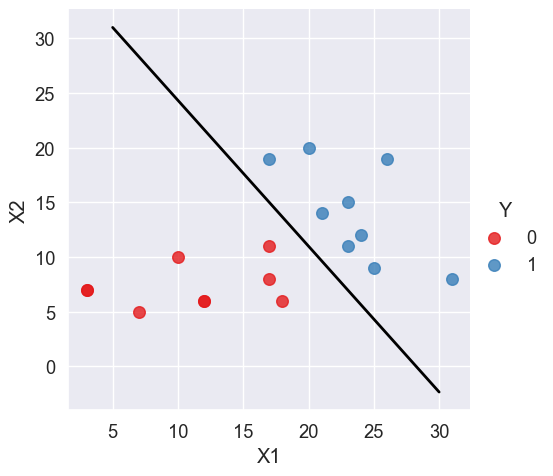

In [13]:
# Plot everything together
sns.lmplot(x = 'X1', y = 'X2', data=dataset, hue='Y', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')

__Step 13:__ Add the margin

In [14]:
margin = 1 / np.sqrt(np.sum(modelSVM.coef_ ** 2))
#margin away from hyperplane in direction perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in 2-d.
margin_y = np.sqrt(1 + a ** 2) * margin
yy_down = yy - margin_y
yy_up = yy + margin_y

/Users/carlos.costa/anaconda3/envs/DM2324/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


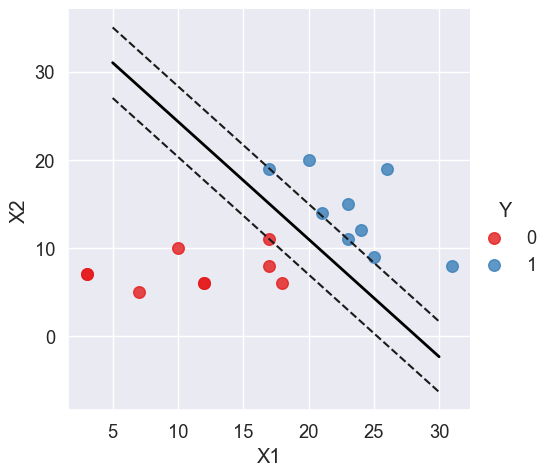

In [15]:
# Plot the margin and support vectors
sns.lmplot(x = 'X1', y = 'X2', data=dataset, hue='Y', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

### Our SVM did a perfect job in separating the data! But...what if our data looked a bit different? 

__Step 14:__ Import the data

In [16]:
dataset2 = pd.read_csv('2_classes_overlap.csv')

In [17]:
dataset2

,X1,X2,Y
0,3,7,0
1,12,6,0
2,18,6,0
3,17,17,0
4,12,6,0
5,3,7,0
6,7,5,0
7,10,10,0
8,17,8,0
9,17,11,0


__Step 15:__ Plot the data on a scatterplot

/Users/carlos.costa/anaconda3/envs/DM2324/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


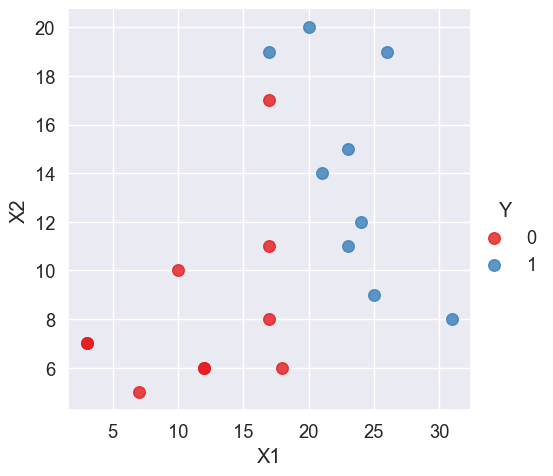

In [18]:
sns.lmplot(x = 'X1', y = 'X2', data=dataset2, hue='Y',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

__Step 16:__ Assign to the object `data2` the values excepting the dependent variable

In [19]:
data2 = dataset2.drop(['Y'], axis=1)

__Step 17:__ Assign to the object `target2`the dependent variable

In [20]:
target2 = dataset2['Y']

__Step 18:__ Create a SVM classifier instance called modelSVM.

In [21]:
modelSVM = SVC(kernel='linear')

__Step 19:__ Use the `.fit()`method of model to fit the model to the data.

In [22]:
modelSVM.fit(data2,target2)

SVC(kernel='linear')

__Step 20:__ Use the `.predict()` method to perform classification.

In [23]:
modelSVM.predict(data2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

__Step 21:__ Use the `.score()` method to obtain the mean accuracy of our model for the given data.

In [24]:
modelSVM.score(data2, target2)

1.0

### Let's visualize the results!

__Step 22:__ Plot the data and the separating line

In [25]:
# Get the separating line
w = modelSVM.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5, 30)
yy = a * xx - (modelSVM.intercept_[0]) / w[1]

/Users/carlos.costa/anaconda3/envs/DM2324/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


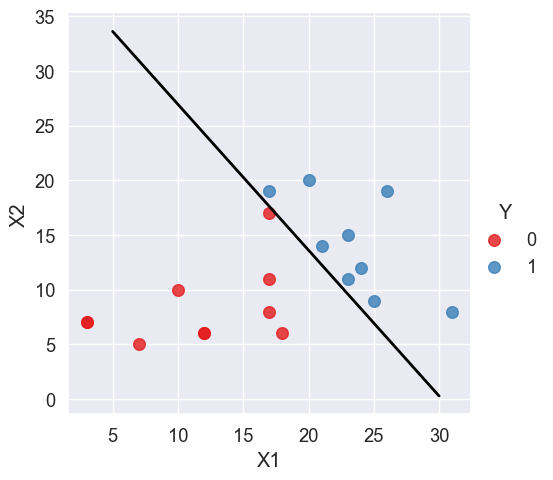

In [26]:
# Plot everything together
sns.lmplot(x = 'X1', y ='X2', data=dataset2, hue='Y', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

__Step 23:__ Add the margin

In [27]:
margin = 1 / np.sqrt(np.sum(modelSVM.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

/Users/carlos.costa/anaconda3/envs/DM2324/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


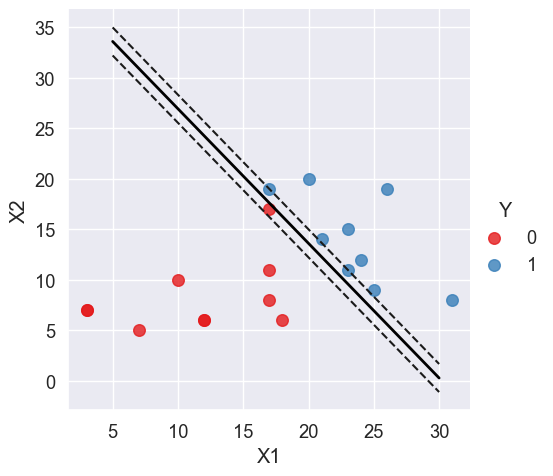

In [28]:
# Plot everyting
sns.lmplot(x = 'X1', y= 'X2', data=dataset2, hue='Y', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

### In this case it seems that a hard margin is not that usefull to classify new data. Let's check if by changing the C if we can improve our classifier!

### <font color='#E8800A'>C |</font> <font color='#3a7f8f'>Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.  </font> <a class="anchor" id="eight-bullet"></a><br><br><br>`default = 1.0`

- Recall, C parameter, for the soft margin cost function, controls the influence of each individual support vector.

__Step 24:__ Create a new classifier with a low C (lower than the default value which is 1.0)

In [29]:
modelSVM_c = SVC(C=0.06,kernel='linear')

__Step 25:__ Use the `.fit()`method of model to fit the model to the data.

In [30]:
modelSVM_c.fit(data2,target2)

SVC(C=0.06, kernel='linear')

__Step 26:__ Use the `.predict()` method to perform classification.

In [31]:
modelSVM_c.predict(data2)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

__Step 27:__ Use the `.score()` method to obtain the mean accuracy of our model for the given data.

In [32]:
modelSVM_c.score(data2, target2)

0.9473684210526315

### Let's visualize the results!

__Step 28:__ Plot the data and the separating line

In [33]:
# Get the separating line
w = modelSVM_c.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5, 30)
yy = a * xx - (modelSVM_c.intercept_[0]) / w[1]

/Users/carlos.costa/anaconda3/envs/DM2324/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


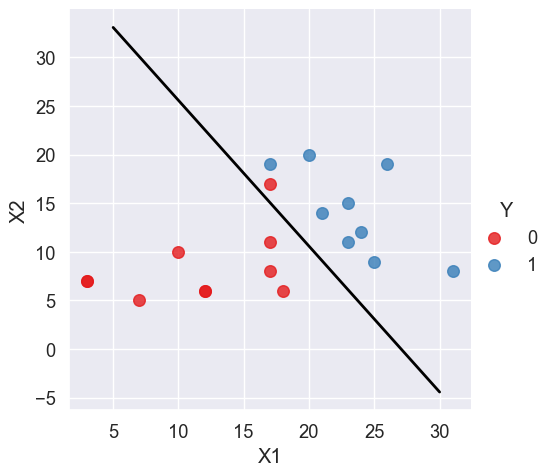

In [34]:
# Plot everything together
sns.lmplot(x= 'X1', y= 'X2', data=dataset2, hue='Y', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

__Step 29:__ Add the margin

In [35]:
margin = 1 / np.sqrt(np.sum(modelSVM_c.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

/Users/carlos.costa/anaconda3/envs/DM2324/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


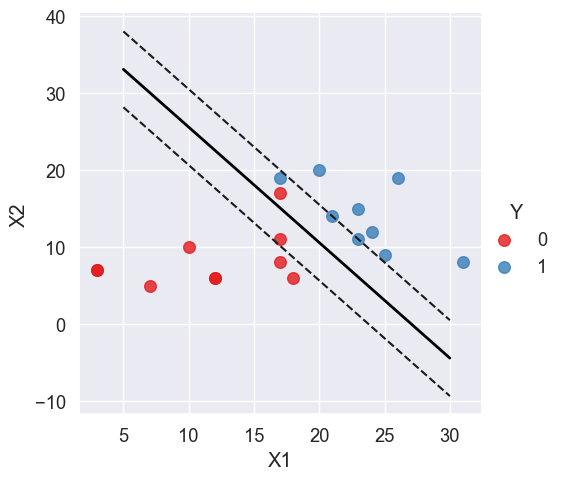

In [36]:
#Plot everything
sns.lmplot(x = 'X1', y ='X2', data=dataset2, hue='Y', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

### With a "softer" margin our model seems to be more adequate to classify new data!

# Now let's apply a SVC to a different (more complex) dataset and do our "usual" exploration (methods, atributes, parameters)!

# <font color='#E8800A'>SVC</font> <a class="anchor" id="second-bullet"></a>
  [Back to TOC](#toc)

**Step 1:** Get the data

In [37]:
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Step 2:** Data partition<br>
- Assign to the name ***data*** the dataset, excluding the dependent variable;
- Assign to the name ***target*** the dependent variable of the dataset;
- Import train_test_split from sklearn
- Create the datasets X_train, X_test, y_train, y_test using the data and the target. Define the test size to 0.2, and the random state to 5.

In [38]:
data = diabetes.drop(['Outcome'], axis=1)
target = diabetes['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=5)

**Step 3:** Standardize the data

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [40]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

**Step 4:** Create a new instance with the default parameters

In [41]:
modelSVM = SVC()

### Methods in SVC

__Step 5:__ Use the `.fit()`method of model to fit the model to the data.

In [42]:
modelSVM.fit(X_train_s, y_train)

SVC()

__Step 6:__ Use the `.predict()` method to perform classification for `X_test_s` and assign the predictions to the object `y_pred`.

In [43]:
y_pred_svm = modelSVM.predict(X_test_s)

__Step 7:__ Use the `.score()` method to obtain the mean accuracy of the given train data `X_train_s` and the true labels for X, `y_train`

In [44]:
modelSVM.score(X_train_s, y_train)

0.8241042345276873

__Step 8:__ Use the `.score()` method to obtain the mean accuracy of the given test data `X_test_s` and the true labels for X, `y_test`

In [45]:
modelSVM.score(X_test_s, y_test)

0.7662337662337663

__Step 9:__ Import `classification_report` from sklearn.metrics.

In [46]:
from sklearn.metrics import classification_report

__Step 10__: Get the classification report for ou SCV

In [47]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



### Attributes in SVC

__Step 11:__ Use the `.support_` attribute to obtain the indices of support vectors.

In [48]:
modelSVM.support_

array([  0,   1,   3,   4,   5,   8,  12,  14,  15,  20,  21,  22,  23,
        24,  25,  26,  30,  32,  33,  35,  36,  37,  38,  39,  46,  52,
        54,  56,  57,  58,  59,  61,  62,  65,  67,  68,  70,  73,  76,
        78,  80,  83,  86,  89,  90,  91,  96,  97, 104, 108, 111, 114,
       120, 122, 124, 128, 130, 132, 137, 143, 145, 146, 152, 153, 155,
       156, 162, 163, 171, 172, 179, 183, 186, 187, 189, 198, 199, 202,
       205, 208, 209, 213, 221, 232, 234, 235, 238, 239, 246, 256, 258,
       268, 273, 275, 276, 282, 284, 285, 288, 293, 309, 316, 320, 323,
       338, 340, 343, 344, 348, 349, 351, 354, 356, 362, 366, 372, 375,
       377, 381, 382, 388, 390, 399, 400, 401, 402, 404, 409, 415, 417,
       423, 424, 429, 432, 433, 435, 439, 440, 441, 446, 447, 451, 454,
       457, 458, 460, 468, 476, 478, 490, 493, 496, 497, 499, 501, 502,
       511, 521, 523, 524, 525, 528, 533, 537, 542, 545, 547, 550, 552,
       564, 565, 566, 568, 569, 570, 571, 578, 582, 583, 589, 59

__Step 12:__ Use the `.support_vectors_` attribute to obtain the support vectors.

In [49]:
modelSVM.support_vectors_

array([[-0.24152934,  0.22455976,  0.45656765, ..., -1.35714472,
        -0.61553019,  1.82612138],
       [ 2.41721789, -1.05299125,  0.25339132, ...,  0.41977309,
        -0.26632474,  1.23838215],
       [ 1.23555246, -0.95717492,  0.65974398, ...,  0.45731361,
         0.39716562,  2.91763709],
       ...,
       [-0.53694569,  2.42833525,  0.050215  , ..., -0.18087518,
        -0.96473564,  1.65819588],
       [ 0.05388702, -0.82941982, -0.2545495 , ...,  0.0068274 ,
        -0.95521186, -0.18898455],
       [ 0.64471974,  0.12874343,  0.45656765, ..., -0.54376685,
         0.32732453,  1.32234489]])

__Step 13:__ Use the `.n_support_` attribute to obtain the number of support vectors for each class.

In [50]:
modelSVM.n_support_

array([185, 173], dtype=int32)

__Step 14:__ Use the `.intercept_` attribute to obtain the constants in decision function. 

In [51]:
modelSVM.intercept_

array([-0.06687489])

__Step 15:__ Use the `.classes_` attribute to obtain the classes labels.

In [52]:
modelSVM.classes_

array([0, 1])

### Parameters in SVC

### <font color='#E8800A'>C |</font> <font color='#3a7f8f'>Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.  </font> <a class="anchor" id="eight-bullet"></a><br><br><br>`default = 1.0`

- Recall, C parameter, for the soft margin cost function, controls the influence of each individual support vector.

__Step 16:__ Change the value of the parameter for the soft margin cost function by setting C to a higher value, like `C=100`. The default value is `C=1.0`.

In [53]:
modelSVM_ch = SVC(C=100)

In [54]:
modelSVM_ch.fit(X_train_s, y_train)

SVC(C=100)

__Step 17__: Create  a function named `metrics` that will print the results of the classification report for two models.

In [55]:
def metrics(y_model1, pred_model1, y_model2, pred_model2):
    print('___________________________________________________________________________________________________________')
    print('                                              Model 1                                                      ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_model1, pred_model1))


    print('___________________________________________________________________________________________________________')
    print('                                              Model 2                                                      ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_model2, pred_model2))

__Step 18:__ Get the results and compare them to the default SVC model.

In [56]:
y_pred_svm_ch = modelSVM_ch.predict(X_test_s)

In [57]:
metrics(y_test, y_pred_svm, y_test, y_pred_svm_ch)

___________________________________________________________________________________________________________
                                              Model 1                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

___________________________________________________________________________________________________________
                                              Model 2                                                      
-----------------------------------------------------------------------------------------------------------
              precision  

__Step 19:__ Change the value of the parameter for the soft margin cost function by setting C to a lower value, like `C=0.5`.

In [58]:
modelSVM_cl = SVC(C=0.5)

__Step 20:__ Get the results and compare them to the default SVC model.

In [59]:
modelSVM_cl.fit(X_train_s, y_train)

SVC(C=0.5)

In [60]:
y_pred_svm_cl = modelSVM_cl.predict(X_test_s)

In [61]:
metrics(y_test, y_pred_svm, y_test, y_pred_svm_cl)

___________________________________________________________________________________________________________
                                              Model 1                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

___________________________________________________________________________________________________________
                                              Model 2                                                      
-----------------------------------------------------------------------------------------------------------
              precision  

### <font color='#E8800A'>kernel |</font> <font color='#3a7f8f'>Specifies the kernel trick to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used.  </font> <a class="anchor" id="eight-bullet"></a>


__Step 21:__ Change the kernel function to linear, by setting `kernel='linear'`. The default is `kernel='rbf'`.

In [62]:
modelSVM_kl = SVC(kernel='linear')

__Step 22:__ Get the results and compare them to the default SVC model.

In [63]:
modelSVM_kl.fit(X_train_s, y_train)

SVC(kernel='linear')

In [64]:
y_pred_svm_kl = modelSVM_kl.predict(X_test_s)

In [65]:
metrics(y_test, y_pred_svm, y_test, y_pred_svm_kl)

___________________________________________________________________________________________________________
                                              Model 1                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

___________________________________________________________________________________________________________
                                              Model 2                                                      
-----------------------------------------------------------------------------------------------------------
              precision  

__Step 23:__ Change the kernel function to polynomial, by setting `kernel='poly'`.

In [66]:
modelSVM_kp = SVC(kernel='poly')

__Step 24:__ Get the results and compare them to the default SVC model.

In [67]:
modelSVM_kp.fit(X_train_s, y_train)

SVC(kernel='poly')

In [68]:
y_pred_svm_kp = modelSVM_kp.predict(X_test_s)

In [69]:
metrics(y_test, y_pred_svm, y_test, y_pred_svm_kp)

___________________________________________________________________________________________________________
                                              Model 1                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

___________________________________________________________________________________________________________
                                              Model 2                                                      
-----------------------------------------------------------------------------------------------------------
              precision  

### <font color='#E8800A'>degree |</font> <font color='#3a7f8f'>Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels. </font> <a class="anchor" id="eight-bullet"></a><br>

__Step 25:__ With the kernel function as polynomial, let's change the degree of the polynomial to two, by setting `degree = 2`. As default, when using a polynomial kernel we have `degree = 3`.

In [70]:
modelSVM_kp2 = SVC(kernel = 'poly', degree = 2)

__Step 26:__ Get the results and compare them to the default SVC model.

In [71]:
modelSVM_kp2.fit(X_train_s, y_train)

SVC(degree=2, kernel='poly')

In [72]:
y_pred_svm_kp2 = modelSVM_kp2.predict(X_test_s)

In [73]:
metrics(y_test, y_pred_svm, y_test, y_pred_svm_kp2)

___________________________________________________________________________________________________________
                                              Model 1                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

___________________________________________________________________________________________________________
                                              Model 2                                                      
-----------------------------------------------------------------------------------------------------------
              precision  

__Step 27:__ Change the kernel function to sigmoid, by setting `kernel='sigmoid'`.

In [74]:
modelSVM_ks = SVC(kernel='sigmoid')

__Step 28:__ Get the results and compare them to the default SVC model.

In [75]:
modelSVM_ks.fit(X_train_s, y_train)

SVC(kernel='sigmoid')

In [76]:
y_pred_svm_ks = modelSVM_ks.predict(X_test_s)

In [77]:
metrics(y_test, y_pred_svm, y_test, y_pred_svm_ks)

___________________________________________________________________________________________________________
                                              Model 1                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

___________________________________________________________________________________________________________
                                              Model 2                                                      
-----------------------------------------------------------------------------------------------------------
              precision  

__Step 29:__ With the kernel function as rbf, let's change the gamma, by setting `gamma = auto`, which is equal to 1/n_features. As default, when using a ‘rbf’, ‘poly’ and ‘sigmoid’ kernel we have `gamma = 1 / (n_features * X.var())`.

In [78]:
modelSVM_rg = SVC(kernel = 'rbf', gamma = 'auto')

__Step 30:__ Get the results and compare them to the default SVC model.

In [79]:
modelSVM_rg.fit(X_train_s, y_train)

SVC(gamma='auto')

In [80]:
y_pred_svm_rg = modelSVM_rg.predict(X_test_s)

In [81]:
metrics(y_test, y_pred_svm, y_test, y_pred_svm_rg)

___________________________________________________________________________________________________________
                                              Model 1                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

___________________________________________________________________________________________________________
                                              Model 2                                                      
-----------------------------------------------------------------------------------------------------------
              precision  

## Let's compare the models using the accuracy!

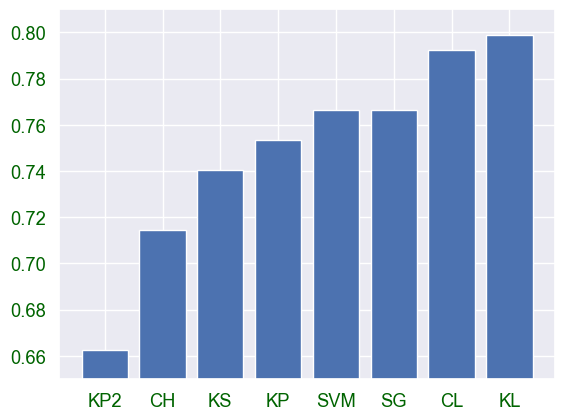

In [82]:
import numpy as np
import matplotlib.pyplot as plt
accuracies = [modelSVM.score(X_test_s, y_test),modelSVM_ch.score(X_test_s, y_test),modelSVM_cl.score(X_test_s, y_test),
             modelSVM_kl.score(X_test_s, y_test),modelSVM_kp.score(X_test_s, y_test),modelSVM_kp2.score(X_test_s, y_test),
             modelSVM_ks.score(X_test_s, y_test),modelSVM_rg.score(X_test_s, y_test)]
models = ['SVM','CH', 'CL', 'KL', 'KP', 'KP2', 'KS', 'SG']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.xticks(color='darkgreen')
plt.yticks(color='darkgreen')
plt.ylim(0.65,0.81)
plt.show()

# <font color='#E8800A'>Exercise</font><a class="anchor" id="third-bullet"></a>
 [Back to TOC](#toc)

Create a Grid Search to decide the best values for the parameter `kernel` and for the soft margin cost function, `C`.

In [83]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.715 total time=   0.3s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.715 total time=   0.4s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.789 total time=   0.3s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.764 total time=   0.2s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.770 total time=   0.2s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.732 total time=   0.0s
[CV 2/5] END ................C=0.1, kernel=poly;, score=0.715 total time=   0.0s
[CV 3/5] END ................C=0.1, kernel=poly;, score=0.732 total time=   0.0s
[CV 4/5] END ................C=0.1, kernel=poly;, score=0.748 total time=   0.0s
[CV 5/5] END ................C=0.1, kernel=poly;, score=0.762 total time=   0.0s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END .................C=0.1, kernel=rbf

[CV 1/5] END ................C=1, kernel=linear;, score=0.724 total time=   1.6s
[CV 2/5] END ................C=1, kernel=linear;, score=0.707 total time=   2.1s
[CV 3/5] END ................C=1, kernel=linear;, score=0.797 total time=   2.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.780 total time=   2.9s
[CV 5/5] END ................C=1, kernel=linear;, score=0.762 total time=   1.3s
[CV 1/5] END ..................C=1, kernel=poly;, score=0.740 total time=   0.0s
[CV 2/5] END ..................C=1, kernel=poly;, score=0.724 total time=   0.0s
[CV 3/5] END ..................C=1, kernel=poly;, score=0.764 total time=   0.0s
[CV 4/5] END ..................C=1, kernel=poly;, score=0.772 total time=   0.0s
[CV 5/5] END ..................C=1, kernel=poly;, score=0.746 total time=   0.0s
[CV 1/5] END ...................C=1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 2/5] END ...................C=1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 3/5] END ...............

Get the results and compare them to the best model obtained previously.

In [84]:
#The best CV score
print(grid.best_score_)

0.7540850326536052


While the model with C = 1 and Kernel = linear had already been the best performing one so far among all that we have seen, we see that the score obtained previously and the resulting from GridSearch are different. The reason is best_score_ gives us the average cross_validation score (in this case averaged across 5 folds).

If we ask this model to make predictions on the same test_data, we see that the performance is the same as the one obtained previously:

In [85]:
grid.score(X_test, y_test)

0.8051948051948052